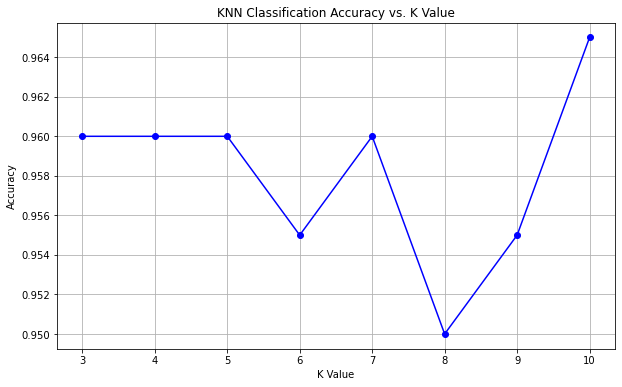

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
data_loc = "datingTestSet.txt"
data = pd.read_csv(data_loc, sep='\t', header=None)
data.columns = ['flight', 'game', 'ice-cream', 'like']

data.loc[data["like"] == "didntLike", "like"] = 0
data.loc[data["like"] == "smallDoses", "like"] = 1
data.loc[data["like"] == "largeDoses", "like"] = 2

y = data['like'].astype('int')
x = data[['flight', 'game', 'ice-cream']]

x = StandardScaler().fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

k_values = range(3, 11)
accuracies = []

for k in k_values:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(x_train, y_train)
    
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)


# 绘制折线图
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('KNN Classification Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()
